# Plotting Iris PCA results using ggplot2

Begin by loading these packages into your R environment.

In [1]:
library(repr)
library(ggplot2)
library(rsvd)

## Load the data and compute the PCs

Load the Iris data.

In [2]:
data(iris)

Replicating [our previous steps](compute-pcs.html), use function `rpca` from the `rsvd` package to compute the principal components.

In [3]:
out.pca <- rpca(iris[1:4],k = 4,center = TRUE,scale = FALSE,retx = TRUE)
iris    <- cbind(iris,out.pca$x)

## Create visualizations of the Iris PCA results

This first plot shows the data samples projected onto the first two PCs, colored by Species. 

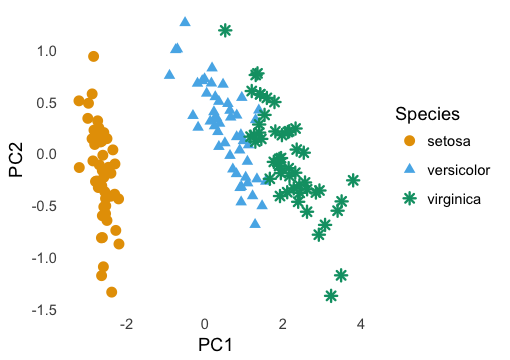

In [4]:
options(repr.plot.width = 4.25, repr.plot.height = 3)
ggplot(iris,aes(x = PC1,y = PC2,color = Species,shape = Species)) + 
  geom_point(size = 1.75,stroke = 1) +
  scale_color_manual(values = c("#E69F00","#56B4E9","#009E73")) +
  scale_shape_manual(values = c(19,17,8)) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

Next, we plot the first PC against Petal Width, with the points colored by Species as before. The linear relationship between the first PC and Petal Width is summarized by the dashed line. 

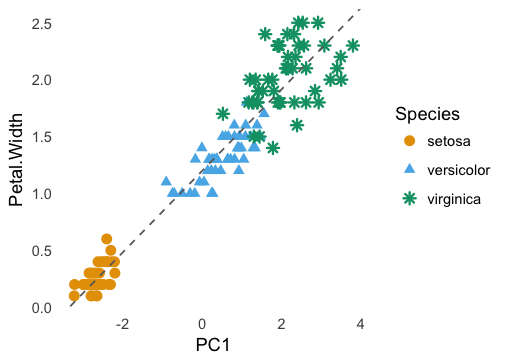

In [5]:
fit.lm <- lm(Petal.Width ~ PC1,iris)
ggplot(iris,aes(x = PC1,y = Petal.Width,color = Species,shape = Species)) + 
  geom_point(size = 1.75,stroke = 1) +
  geom_abline(intercept = coef(fit.lm)["(Intercept)"],slope = coef(fit.lm)["PC1"],
              color = "dimgray",linetype = "dashed") +
  scale_color_manual(values = c("#E69F00","#56B4E9","#009E73")) +
  scale_shape_manual(values = c(19,17,8)) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

## Session information

This is the version of R and the packages that were used to generate
these results.

In [6]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.5

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] rsvd_0.6      ggplot2_2.2.1 repr_0.12.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11     assertthat_0.2.0 digest_0.6.12    crayon_1.3.2    
 [5] IRdisplay_0.4.4  plyr_1.8.4       grid_3.3.2       R6_2.2.0        
 [9] jsonlite_1.5     gtable_0.2.0     magrittr_1.5     evaluate_0.10.1 
[13] scales_0.4.1     stringi_1.1.2    lazyeval_0.2.0   uuid_0.1-2      
[17] IRkernel_0.7     labeling_0.3     tools_3.3.2      stringr_1.2.0   
[21] munsell_0.4.3    colorspace_1.3-2 pbdZMQ_0.2-5     tibble_1.2      